In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pickle
import datetime
import glob

In [2]:
inFile = 'PFISR_Conductance_20150316T1304UT_20150325T2355UT.pkl'
#inFile = './agu2018/PFISR_Conductance_20150621T0633UT_20150624T2357UT.pkl'
with open(inFile, 'r') as f:
    d = pickle.load(f)

In [3]:
# make the labels

t1970 = datetime.datetime(1970,1,1,0,0,0)
dtStart = datetime.datetime.utcfromtimestamp(d['UnixTime'][0])
dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
tUnixStartTime = (dtStartDay-t1970).total_seconds()

dtEnd = datetime.datetime.utcfromtimestamp(d['UnixTime'][-1])
dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
tUnixEndTime = (dtEndDay-t1970).total_seconds()


In [4]:
print tUnixStartTime, tUnixEndTime

1426464000.0 1427328000.0


In [17]:
# make a uniform range that is separated by so many hours
dt = 24.*3600.

locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)

In [18]:
labels = list()
for itime in locs:
    tmpdt = datetime.datetime.utcfromtimestamp(itime)
    tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
    print tmplabel
    labels.append(tmplabel)

03/16
00:00
03/17
00:00
03/18
00:00
03/19
00:00
03/20
00:00
03/21
00:00
03/22
00:00
03/23
00:00
03/24
00:00
03/25
00:00
03/26
00:00


In [19]:
tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
tmpdt = datetime.datetime.utcfromtimestamp(locs[-1])
tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt.hour, tmpdt.minute)

title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
print tStartStr, tEndStr, title

2015-03-16 00:00 UT 2015-03-26 00:00 UT PFISR Conductance 2015-03-16 00:00 UT - 2015-03-26 00:00 UT


In [20]:
print labels

['03/16\n00:00', '03/17\n00:00', '03/18\n00:00', '03/19\n00:00', '03/20\n00:00', '03/21\n00:00', '03/22\n00:00', '03/23\n00:00', '03/24\n00:00', '03/25\n00:00', '03/26\n00:00']


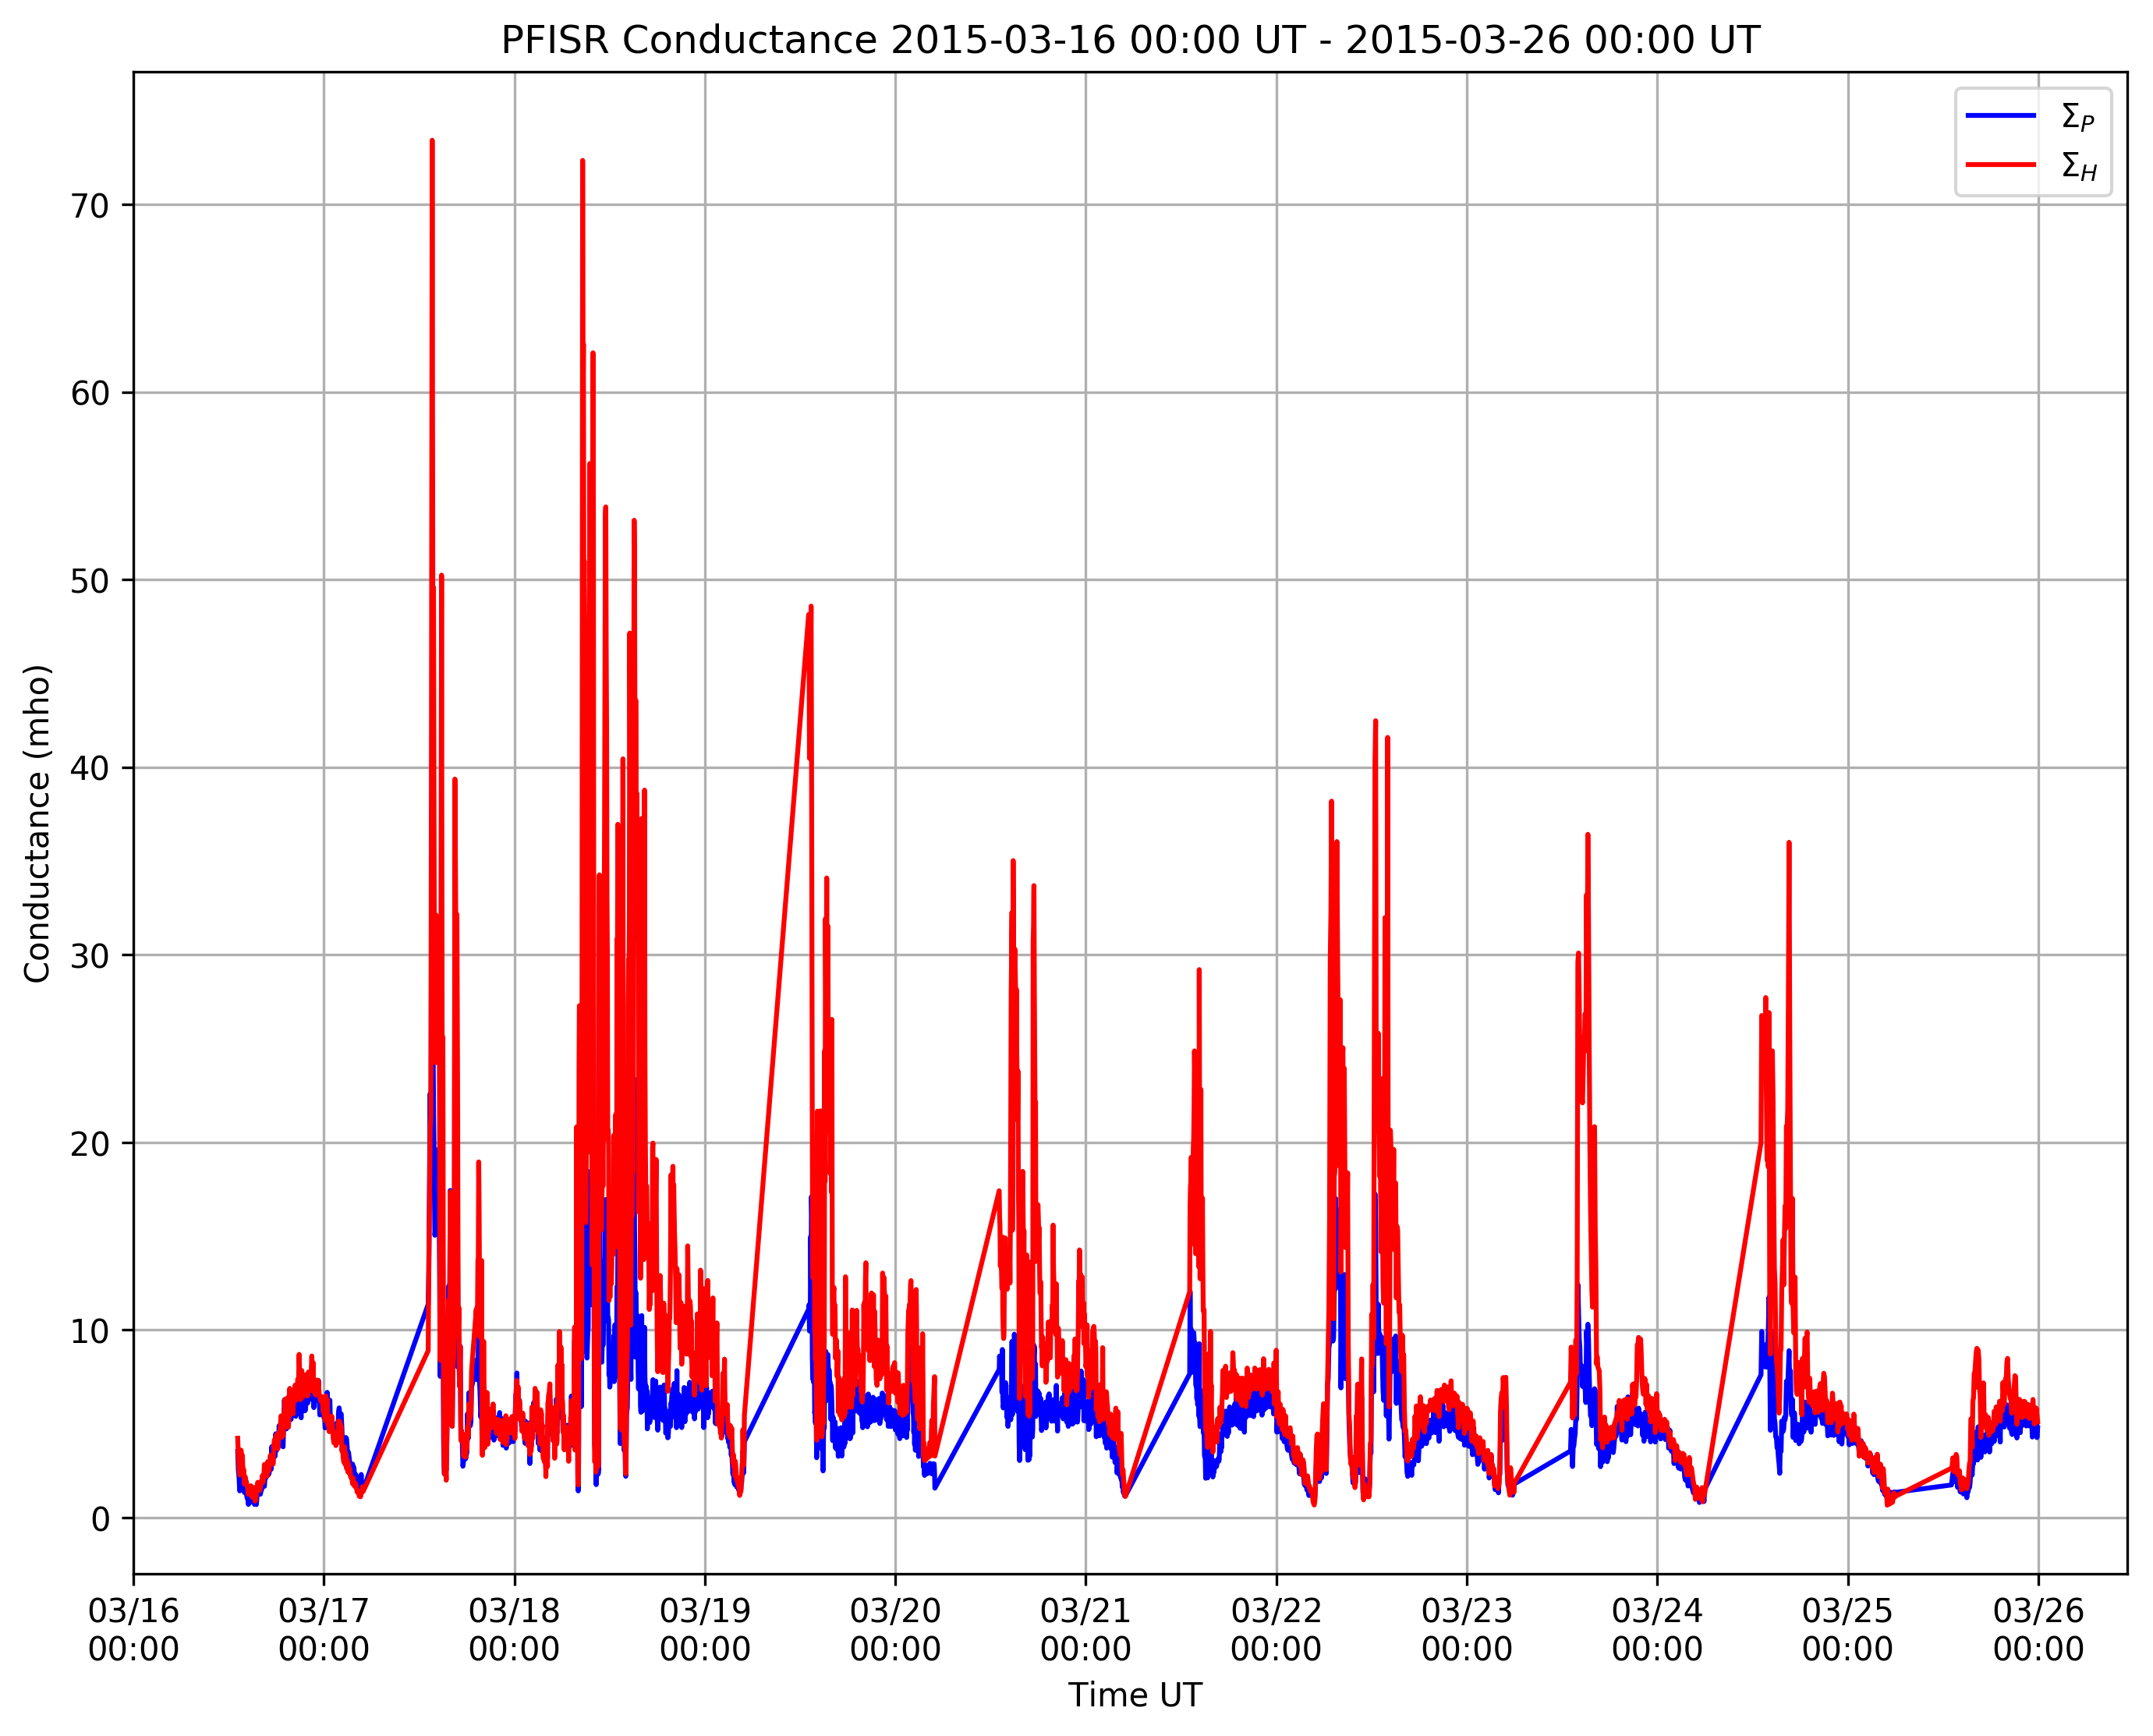

In [22]:
plt.figure(dpi=300, figsize=(11,8.5))
plt.plot(d['UnixTime'][d['PedersenConductance']>0], d['PedersenConductance'][d['PedersenConductance']>0], 'b-', label=r'$\Sigma_{P}$')
plt.plot(d['UnixTime'][d['HallConductance']>0], d['HallConductance'][d['HallConductance']>0], 'r-', label=r'$\Sigma_{H}$')
plt.xticks(locs, labels)
plt.legend()
plt.grid()
plt.title(title)
plt.ylabel('Conductance (mho)')
plt.xlabel(' Time UT')
plt.savefig('PFISR_Conductance_20150316_20150326.pdf')
# plt.xticklabels(labels)

In [10]:
def MakeFigure(inFile):
    with open(inFile, 'r') as f:
        d = pickle.load(f)
    
    # make the labels

    t1970 = datetime.datetime(1970,1,1,0,0,0)
    dtStart = datetime.datetime.utcfromtimestamp(d['UnixTime'][0])
    dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
    tUnixStartTime = (dtStartDay-t1970).total_seconds()

    dtEnd = datetime.datetime.utcfromtimestamp(d['UnixTime'][-1])
    dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
    tUnixEndTime = (dtEndDay-t1970).total_seconds()
    
    # make a uniform range that is separated by so many hours
    dt = 6.*3600.
    locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)
    
    labels = list()
    for itime in locs:
        tmpdt = datetime.datetime.utcfromtimestamp(itime)
        tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
        print tmplabel
        labels.append(tmplabel)
    
    tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
    tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
    tmpdt = datetime.datetime.utcfromtimestamp(locs[-1])
    tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt.hour, tmpdt.minute)

    title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
    print tStartStr, tEndStr, title
    
    outFile = inFile[0:-4]+'.pdf'
    
    plt.figure(dpi=300, figsize=(10,8))
    plt.plot(d['UnixTime'][d['PedersenConductance']>0], d['PedersenConductance'][d['PedersenConductance']>0], 'b-', label=r'$\Sigma_{P}$')
    plt.plot(d['UnixTime'][d['HallConductance']>0], d['HallConductance'][d['HallConductance']>0], 'r-', label=r'$\Sigma_{H}$')
    plt.xticks(locs, labels, fontsize=12)
    plt.yticks(fontsize=14)
    plt.legend( prop={'size': 16})
    plt.grid()
    plt.title(title, fontsize=16)
    plt.ylabel('Conductance (mho)', fontsize=16)
    plt.xlabel('Time UT', fontsize=16)
    plt.tight_layout()
    plt.savefig(outFile)
    plt.close()
    
    return

In [11]:
fileList = sorted(glob.glob('./agu2018/*.pkl'))
for i in fileList:
    MakeFigure(i)